In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('data/hci_add_on_full.csv')
df['subject'] = df['subject'].ffill()
unique_subjects = df['subject'].unique()
subject_mapping = {subject: f"Subject_{i+1}" for i, subject in enumerate(unique_subjects)}

# Replace the actual names with anonymous IDs
df['subject'] = df['subject'].map(subject_mapping)

# Display the first few rows to verify the anonymization
df.head()
df

,subject,variant,post,time,clicks,confidence
0,Subject_1,Two feeds,Walnut St Alert,9.51,5,3.0
1,Subject_1,One feed,Rabbi Goldstein,10.96,10,3.3
2,Subject_2,One feed,Walnut St Alert,12.24,13,3.5
3,Subject_2,Two feeds,Rabbi Goldstein,5.34,5,3.9
4,Subject_3,Two feeds,Walnut St Alert,9.64,5,2.8
5,Subject_3,One feed,Rabbi Goldstein,13.81,8,4.8
6,Subject_4,One feed,Walnut St Alert,12.07,13,3.1
7,Subject_4,Two feeds,Rabbi Goldstein,6.81,6,4.8
8,Subject_5,Two feeds,Walnut St Alert,10.43,4,4.1
9,Subject_5,One feed,Rabbi Goldstein,9.93,6,4.2


In [ ]:
df.to_csv('data/hci_add_on_full_anonymized.csv', index=False)

**Run from here with the csv already created**

In [21]:
df = pd.read_csv('data/hci_add_on_full_anonymized.csv')

In [13]:
df_grouped = df.groupby(['variant']).agg(
  {
  'time': ['mean', 'std'],
  'clicks': ['mean', 'std'],
  'confidence': ['mean', 'std']
  }
  ).reset_index()
df_grouped

variant     time           clicks           confidence          
                 mean       std   mean       std       mean       std
0   One feed  10.4196  3.265954  10.08  2.253146      3.804  0.636710
1  Two feeds   8.7352  2.972681   4.76  1.963840      3.996  0.715588

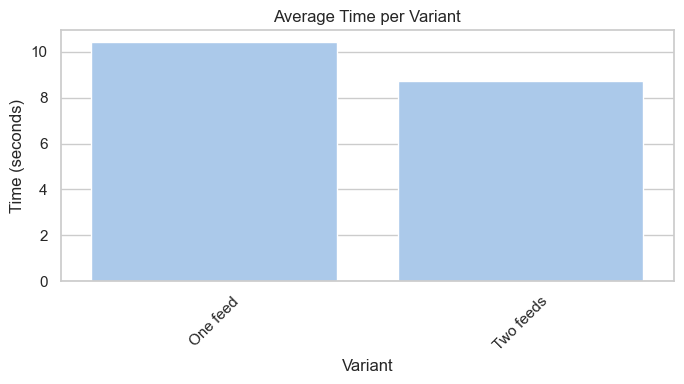

In [14]:
plt.figure(figsize=(7, 4))
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1)
sns.set_style("whitegrid")
sns.barplot(x='variant', y=('time', 'mean'), data=df_grouped)
plt.title('Average Time per Variant')
plt.xlabel('Variant')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

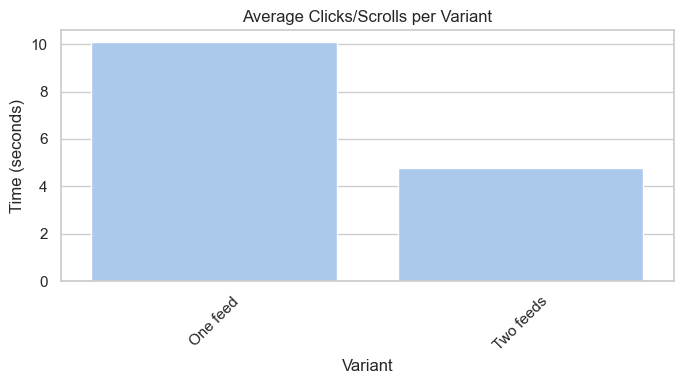

In [15]:
plt.figure(figsize=(7, 4))
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1)
sns.set_style("whitegrid")
sns.barplot(x='variant', y=('clicks', 'mean'), data=df_grouped)
plt.title('Average Clicks/Scrolls per Variant')
plt.xlabel('Variant')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

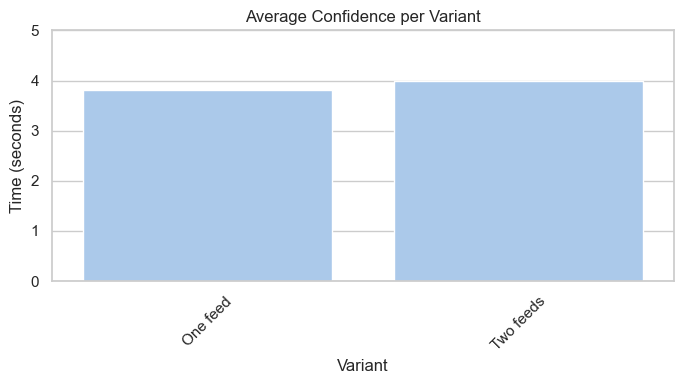

In [16]:
plt.figure(figsize=(7, 4))
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1)
sns.set_style("whitegrid")
sns.barplot(x='variant', y=('confidence', 'mean'), data=df_grouped)
plt.title('Average Confidence per Variant')
plt.xlabel('Variant')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.ylim(0, 5.0)
plt.tight_layout()
plt.show()

Paired t-test results:
t-statistic: 1.8601
p-value: 0.0752
Mean difference (one feed - two feed): 1.6844 seconds


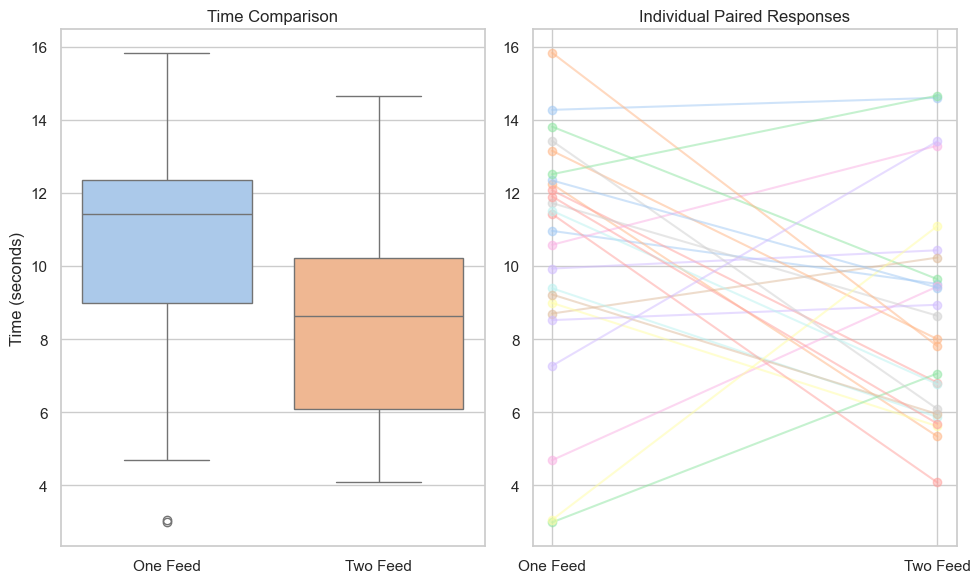

In [17]:
from scipy import stats

# Filter data for one feed and two feed variants
one_feed = df[df['variant'] == 'One feed'][['subject', 'time']]
two_feed = df[df['variant'] == 'Two feeds'][['subject', 'time']]

# Rename columns to avoid confusion after merging
one_feed = one_feed.rename(columns={'time': 'time_one_feed'})
two_feed = two_feed.rename(columns={'time': 'time_two_feed'})

# Merge the dataframes on subject to get paired observations
paired_data = one_feed.merge(two_feed, on='subject')

# Run paired t-test
t_stat, p_value = stats.ttest_rel(paired_data['time_one_feed'], paired_data['time_two_feed'])

# Output results
print(f"Paired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Mean difference (one feed - two feed): {paired_data['time_one_feed'].mean() - paired_data['time_two_feed'].mean():.4f} seconds")

# Visualize the paired differences
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=paired_data[['time_one_feed', 'time_two_feed']])
plt.title('Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks([0, 1], ['One Feed', 'Two Feed'])

plt.subplot(1, 2, 2)
for i in range(len(paired_data)):
    plt.plot([1, 2], [paired_data.iloc[i]['time_one_feed'], paired_data.iloc[i]['time_two_feed']], 'o-', alpha=0.5)
plt.xticks([1, 2], ['One Feed', 'Two Feed'])
plt.title('Individual Paired Responses')
plt.tight_layout()
plt.show()

Paired t-test results:
t-statistic: 12.4566
p-value: 0.0000
Mean difference (one feed - two feed): 5.3200 clicks


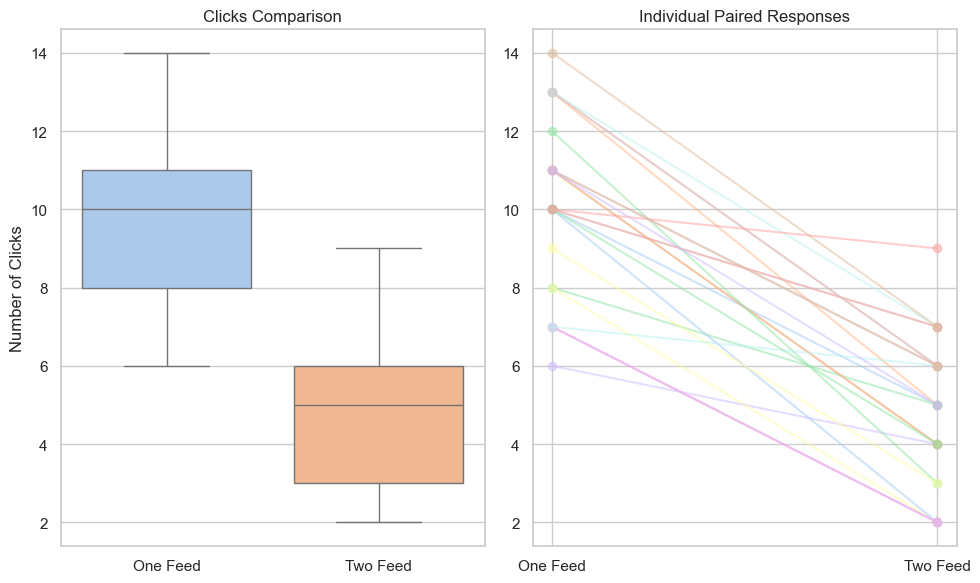

In [18]:
from scipy import stats

# Filter data for one feed and two feed variants
one_feed = df[df['variant'] == 'One feed'][['subject', 'clicks']]
two_feed = df[df['variant'] == 'Two feeds'][['subject', 'clicks']]

# Rename columns to avoid confusion after merging
one_feed = one_feed.rename(columns={'clicks': 'clicks_one_feed'})
two_feed = two_feed.rename(columns={'clicks': 'clicks_two_feed'})

# Merge the dataframes on subject to get paired observations
paired_data = one_feed.merge(two_feed, on='subject')

# Run paired t-test
t_stat, p_value = stats.ttest_rel(paired_data['clicks_one_feed'], paired_data['clicks_two_feed'])

# Output results
print(f"Paired t-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Mean difference (one feed - two feed): {paired_data['clicks_one_feed'].mean() - paired_data['clicks_two_feed'].mean():.4f} clicks")

# Visualize the paired differences
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=paired_data[['clicks_one_feed', 'clicks_two_feed']])
plt.title('Clicks Comparison')
plt.ylabel('Number of Clicks')
plt.xticks([0, 1], ['One Feed', 'Two Feed'])

plt.subplot(1, 2, 2)
for i in range(len(paired_data)):
    plt.plot([1, 2], [paired_data.iloc[i]['clicks_one_feed'], paired_data.iloc[i]['clicks_two_feed']], 'o-', alpha=0.5)
plt.xticks([1, 2], ['One Feed', 'Two Feed'])
plt.title('Individual Paired Responses')
plt.tight_layout()
plt.show()

Wilcoxon signed-rank test results:
statistic: 132.5000
p-value: 0.4418
Median confidence (one feed): 3.8
Median confidence (two feeds): 4.2


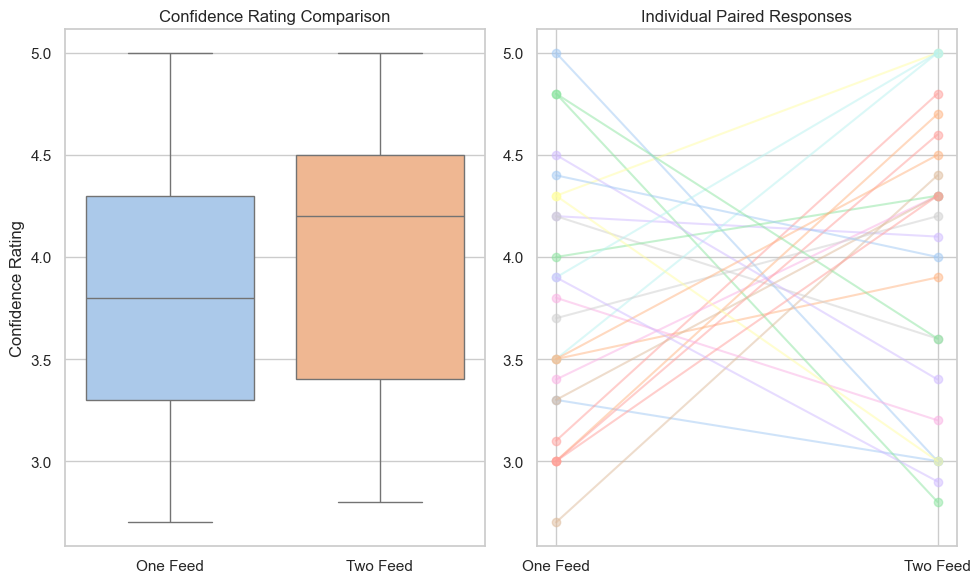

In [19]:
from scipy import stats

# Filter data for one feed and two feed variants
one_feed = df[df['variant'] == 'One feed'][['subject', 'confidence']]
two_feed = df[df['variant'] == 'Two feeds'][['subject', 'confidence']]

# Rename columns to avoid confusion after merging
one_feed = one_feed.rename(columns={'confidence': 'confidence_one_feed'})
two_feed = two_feed.rename(columns={'confidence': 'confidence_two_feed'})

# Merge the dataframes on subject to get paired observations
paired_data = one_feed.merge(two_feed, on='subject')

# Run Wilcoxon signed-rank test
stat, p_value = stats.wilcoxon(paired_data['confidence_one_feed'], 
                               paired_data['confidence_two_feed'])

# Output results
print(f"Wilcoxon signed-rank test results:")
print(f"statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Median confidence (one feed): {paired_data['confidence_one_feed'].median()}")
print(f"Median confidence (two feeds): {paired_data['confidence_two_feed'].median()}")

# Visualize the paired differences
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=paired_data[['confidence_one_feed', 'confidence_two_feed']])
plt.title('Confidence Rating Comparison')
plt.ylabel('Confidence Rating')
plt.xticks([0, 1], ['One Feed', 'Two Feed'])

plt.subplot(1, 2, 2)
for i in range(len(paired_data)):
    plt.plot([1, 2], [paired_data.iloc[i]['confidence_one_feed'], 
                     paired_data.iloc[i]['confidence_two_feed']], 'o-', alpha=0.5)
plt.xticks([1, 2], ['One Feed', 'Two Feed'])
plt.title('Individual Paired Responses')
plt.tight_layout()
plt.show()